In [9]:
# 2. DATASET과 DATALOADER

# 2-1. 데이터셋 불러오기 (FashionMNIST, 28x28 이미지와 10개의 class 중 하나인 정답(label) 구성)
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",          #학습/테스트 데이터가 저장되는 경로
    train=True,           #학습용 또는 테스트용 데이터셋 여부 지정
    download=True,        #root에 데이터가 없는 경우 인터넷에서 다운로드
    transform=ToTensor()  #특징(feature)과 정답(label) 변형(transform) 지정
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

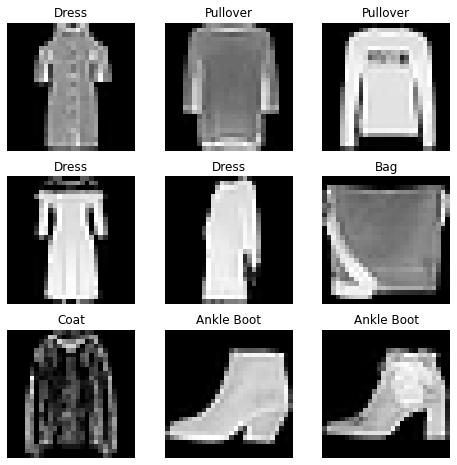

In [10]:
# 2-2. 데이터셋을 반복하고 시각화하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    """print(sample_idx)"""
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
# 2-3. 파일에서 사용자 정의 데이터셋 만들기
#__init__, __len__, __getitem__ 세가지 함수 구현해야 함.
#FashionMNIST 이미지들은 img_dir 디렉토리에 저장됨, 정답(label)은 annotation_file csv 파일에 저장됨 (ex: tshirt1.jpg, 0 / ,,,)
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    #이미지와 annotation_file이 포함된 디렉토리와 두가지 변형(transform)을 초기화함
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):  
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    #데이터셋의 샘플 개수 반환
    def __len__(self):
        return len(self.img_labels)
    
    #주어진 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환
    def __getitem__(self, idx):
        img_path - os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)          #이미지를 텐서로 변환
        label - self.img_labels.iloc[idx, 1]  #csv의 데이터로부터 정답(label)가져옴
        if self.transform:                    #정답 해당하는 경우 변형(transform) 후 텐서이미지와 라벨을 dictionary형으로 반환
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [2]:
import sys
print(sys.executable)

/usr/bin/python3.7


In [5]:
!pip list

Package                       Version
----------------------------- -----------------------
anyio                         2.2.0
apturl                        0.5.2
argon2-cffi                   20.1.0
async-generator               1.10
attrs                         20.3.0
Babel                         2.9.0
backcall                      0.2.0
beautifulsoup4                4.4.1
bleach                        3.3.0
blinker                       1.3
Brlapi                        0.6.4
certifi                       2020.12.5
cffi                          1.14.5
chardet                       4.0.0
checkbox-support              0.22
command-not-found             0.3
cryptography                  1.2.3
cycler                        0.10.0
decorator                     5.0.7
defer                         1.0.6
defusedxml                    0.7.1
deprecation                   2.1.0
distro-info                   0.14ubuntu0.2
entrypoints                   0.3
feedparser                    5.1.3


In [6]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 10.7 MB/s eta 0:00:01   |██████▉                         | 2.3 MB 842 kB/s eta 0:00:11


In [12]:
# 2-4. DataLoader로 학습용 데이터 준비하기
#Dataset은 데이터의 feature 가져오고 label 지정하는 일을 한 번에 함.
#모델 학습할 때 샘플들을 minibatch로 전달, 매 epoch마다 데이터를 섞어 overfit을 막고 multiprocessing을 사용해 데이터 검색 속도 높이려고 함.
#DataLoader: API, 위의 과정을 추상화한 iteratable한 객체임.
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


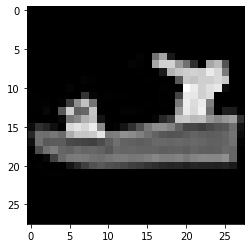

Label: 5


In [18]:
# 2-5. DataLoader를 통해 반복하기(iterate)
#iter은 train_featuers, train_labels 묶음(batch) 반환
#DataLoader의 shuffer=True 이므로 모든 배치를 반복한 뒤 데이터가 섞임. 실행할 때마다 다른 이미지로 학습.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")